In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6) #change the size of fig drawn (width=10,ht=6)


In [2]:
train = pd.read_csv("pred_train.csv")
test = pd.read_csv("pred_test.csv")

In [3]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [4]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.8+ MB


In [6]:
train = train.drop(['name','desc','keywords'],axis=1)      # These columns are not useful for our purposes


In [7]:
train.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,300.0,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,30.0,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,500.0,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,2000.0,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [8]:
train['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'NZ', 'NL', 'SE', 'IE', 'NO', 'DK', 'DE'], dtype=object)

In [9]:
train['currency'].unique()

array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK'], dtype=object)

In [10]:
train = train.drop(['project_id'],axis=1)      # These columns are not useful for our purposes


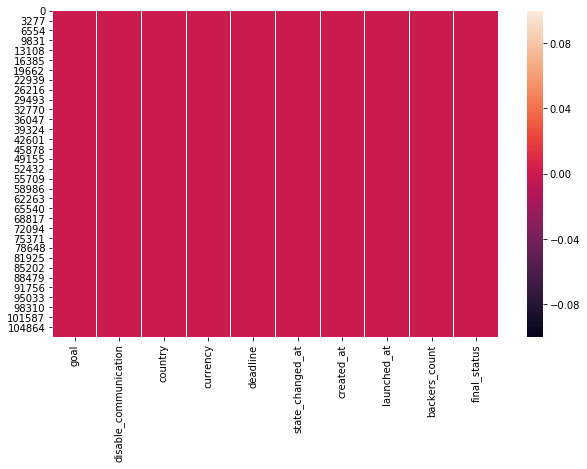

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 10 columns):
goal                     108129 non-null float64
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 7.5+ MB


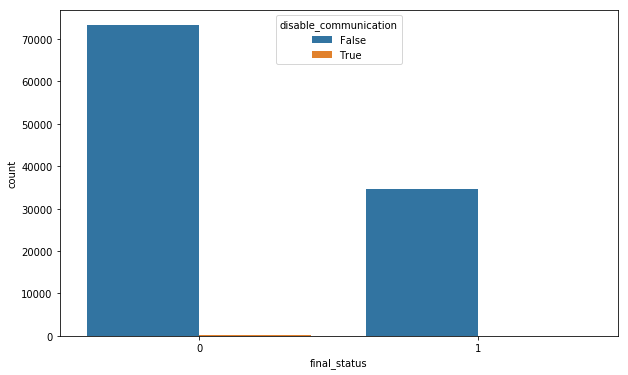

In [13]:
sns.countplot(x='final_status', hue='disable_communication',data=train)

In [14]:
train['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [15]:
import datetime
def deadlines(s):
    a = str(s)
    return (
      datetime.datetime.fromtimestamp(
          int(a)
       ).strftime('%Y-%m-%d %H:%M:%S')
     )


In [ ]:
print(train['state_changed_at']-train['deadline'])

In [ ]:
print(train['launched_at']-train['created_at'])

In [18]:
train['dead_diff'] = (train['state_changed_at']-train['deadline'])

In [19]:
print("The skewness of deadline is {}".format(train['dead_diff'].skew()))

The skewness of deadline is -5.0609445954259735


In [20]:
train['deploy_diff'] = (train['launched_at']-train['created_at'])

In [21]:
print("The skewness of deployment is {}".format(train['deploy_diff'].skew()))

The skewness of deployment is 5.912178748538803


In [22]:
#non-numeric features

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,disable_communication,country,currency
count,108129,108129,108129
unique,2,11,9
top,False,US,USD
freq,107806,92033,92033


Skew is: -5.06094459543


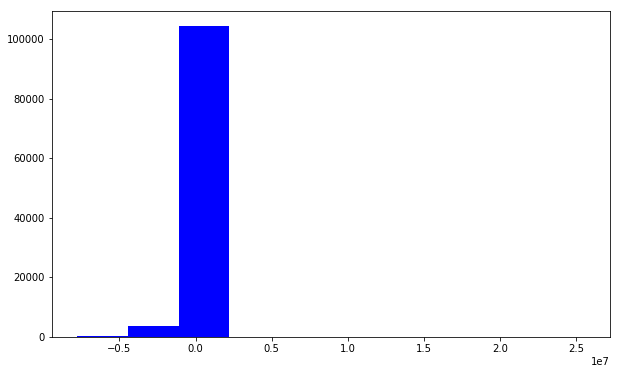

In [23]:
#Skewed Distribution
print("Skew is:", train.dead_diff.skew())
plt.hist(train.dead_diff, color = 'blue')
plt.show()

Skew is: 5.91217874854


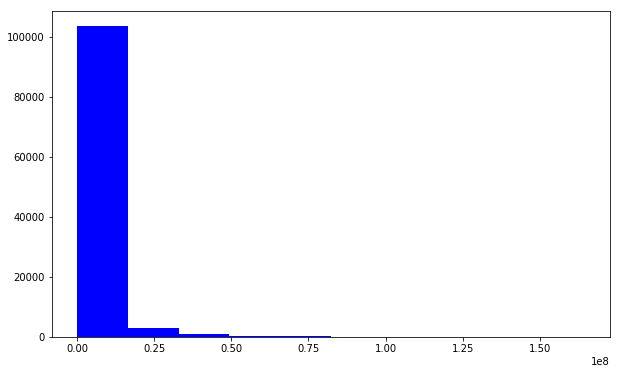

In [24]:
#Skewed Distribution
print("Skew is:", train.deploy_diff.skew())
plt.hist(train.deploy_diff, color = 'blue')
plt.show()

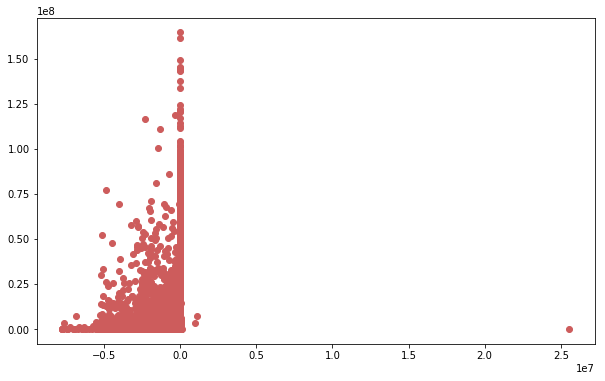

In [25]:
plt.scatter(x=train['dead_diff'],y=train['deploy_diff'],color='indianred')

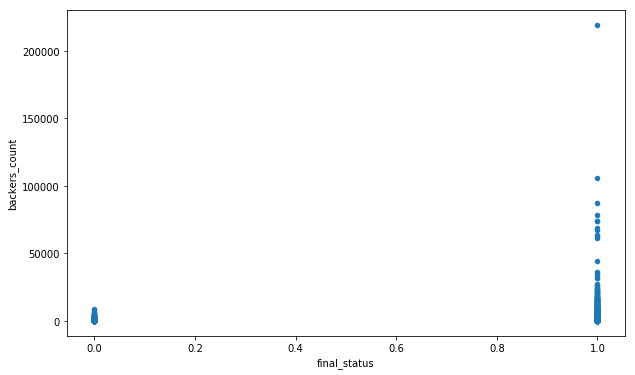

In [26]:
train.plot.scatter(x='final_status',y='backers_count')

In [27]:
train['backers_count'].mean()

123.51666065532835

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [29]:
test.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


In [30]:
test.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at'],
      dtype='object')

In [31]:
test.describe()

,goal,deadline,state_changed_at,created_at,launched_at
count,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04
mean,3.532372e+04,1.459009e+09,1.458278e+09,1.451771e+09,1.456135e+09
std,1.206678e+06,1.638850e+07,1.571211e+07,1.983827e+07,1.641921e+07
min,1.000000e+00,1.433117e+09,1.428069e+09,1.266343e+09,1.427940e+09
25%,2.000000e+03,1.444522e+09,1.444419e+09,1.438098e+09,1.441756e+09
50%,6.000000e+03,1.458415e+09,1.458254e+09,1.452243e+09,1.455635e+09
75%,2.000000e+04,1.472587e+09,1.470672e+09,1.466366e+09,1.469650e+09
max,1.000000e+08,1.490916e+09,1.490915e+09,1.490228e+09,1.490297e+09


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 12 columns):
project_id               63465 non-null object
name                     63465 non-null object
desc                     63461 non-null object
goal                     63465 non-null float64
keywords                 63465 non-null object
disable_communication    63465 non-null bool
country                  63465 non-null object
currency                 63465 non-null object
deadline                 63465 non-null int64
state_changed_at         63465 non-null int64
created_at               63465 non-null int64
launched_at              63465 non-null int64
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 5.4+ MB


In [33]:
X_train = train[['deadline','state_changed_at','created_at','launched_at','goal']]
Y_train = train['final_status']

X_test = test[['deadline','state_changed_at','created_at','launched_at','goal']]

#index
idx = test['project_id']

X_train.shape , Y_train.shape ,X_test.shape, idx.shape

((108129, 5), (108129,), (63465, 5), (63465,))

In [34]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

score_val = rf.score(X_train,Y_train)

print("Training score is :",score_val)

out_rf = rf.predict(X_test)

Training score is : 0.999944510723


In [35]:
submission = pd.DataFrame({"project_id":idx,"final_status":out_rf})

submission.to_csv('sub_success.csv',index=False)

In [36]:
submiss = pd.DataFrame()
submiss['project_id'] = test.project_id

In [37]:
submiss['final_status'] = out_rf
submiss.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0


In [46]:
submiss[['project_id','final_status']]

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0
5,kkst994744324,0
6,kkst366471810,0
7,kkst1686645245,1
8,kkst1009612119,0
9,kkst774947236,0


In [43]:
submission.to_csv('successarycheck.csv',index=False)

In [47]:
submiss.columns

Index(['project_id', 'final_status'], dtype='object')

In [48]:
submiss.to_csv('check.csv',index=False)